In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

data1 = pd.read_csv('2d_data.txt', delimiter=' ', names=['x','y'])

<Axes: xlabel='x', ylabel='y'>

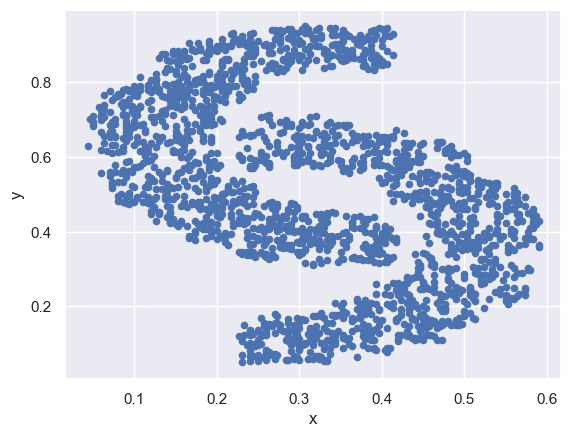

In [2]:
data1.plot.scatter(x='x',y='y')
# plt.axis('off')

<Axes: xlabel='x', ylabel='y'>

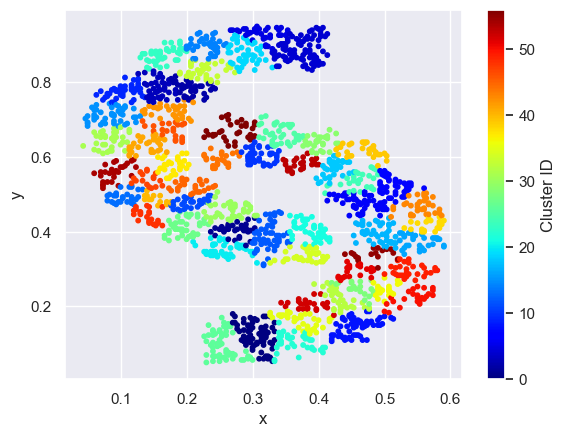

In [3]:
from sklearn import cluster

bd = 0.038
ms1 = cluster.MeanShift(bandwidth=bd)
ms1.fit(data1)
labels1 = pd.DataFrame(ms1.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',s=10)
# plt.axis('off')

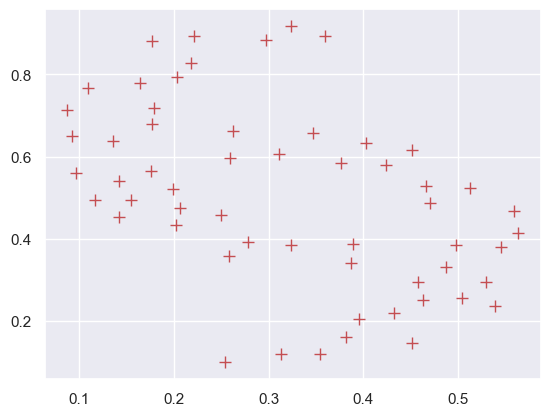

In [4]:
data_c1 = ms1.cluster_centers_
# result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',s=10)
plt.plot(data_c1[:,0],data_c1[:,1],'r+', ms=9, mew=1)

plt.show()

In [5]:
from sklearn.metrics import pairwise_distances

# Get the Cluster IDs from the result1 dataframe
cluster_ids = result1['Cluster ID'].unique()

# Sort the cluster IDs in ascending order
sorted_cluster_ids = sorted(cluster_ids)

# Calculate the pairwise distances between the sorted cluster IDs
sorted_distances = pairwise_distances(data1, metric='euclidean')

# Create a dataframe with sorted Cluster IDs as rows and columns
distance_matrix = pd.DataFrame(sorted_distances, index=result1['Cluster ID'], columns=result1['Cluster ID'])
distance_matrix

Cluster ID,31,15,15,15,15,15,15,54,31,31,...,38,38,38,43,43,38,43,16,16,38
Cluster ID,,,,,,,,,,,,,,,,,,,,,
31,1.053671e-08,0.073379,0.053719,0.060373,0.063654,0.080280,0.104165,0.075178,0.019465,0.040321,...,0.579396,0.577002,0.572451,0.569210,0.566127,0.582566,0.574578,0.609738,0.608284,0.582135
15,7.337881e-02,0.000000,0.020270,0.013703,0.010530,0.007469,0.031623,0.147202,0.084355,0.038942,...,0.606794,0.603695,0.597718,0.593381,0.589181,0.609802,0.599333,0.642674,0.640917,0.608168
15,5.371946e-02,0.020270,0.000000,0.006700,0.010000,0.026700,0.050447,0.126994,0.064085,0.019379,...,0.594757,0.591821,0.586177,0.582098,0.578162,0.597807,0.587917,0.629383,0.627694,0.596457
15,6.037292e-02,0.013703,0.006700,0.000000,0.003300,0.020000,0.043815,0.133675,0.070711,0.025355,...,0.597753,0.594757,0.588990,0.584815,0.580783,0.600789,0.590684,0.632851,0.631136,0.599333
15,6.365359e-02,0.010530,0.010000,0.003300,0.000000,0.016700,0.040557,0.136966,0.073979,0.028418,...,0.599251,0.596225,0.590398,0.586177,0.582098,0.602279,0.592070,0.634578,0.632851,0.600772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,5.825664e-01,0.609802,0.597807,0.600789,0.602279,0.610038,0.615676,0.544151,0.563394,0.581613,...,0.003400,0.007513,0.020287,0.030192,0.040144,0.000000,0.023300,0.060091,0.056796,0.010530
43,5.745785e-01,0.599333,0.587917,0.590684,0.592070,0.599313,0.604152,0.538769,0.555550,0.572119,...,0.023547,0.016945,0.004738,0.007513,0.017043,0.023300,0.000000,0.083365,0.080068,0.013703
16,6.097384e-01,0.642674,0.629383,0.632851,0.634578,0.643506,0.650970,0.565324,0.590339,0.612344,...,0.060373,0.067036,0.080280,0.090249,0.100224,0.060091,0.083365,0.000000,0.003300,0.070000


In [6]:
dismatrix = pd.DataFrame(index=sorted_cluster_ids, columns=sorted_cluster_ids)
for i in sorted_cluster_ids:
    for j in sorted_cluster_ids:
        if i != j:
            dismatrix.loc[i, j]=distance_matrix.loc[i, j].min().min()
        else:
            dismatrix.loc[i, j]=99
dismatrix

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,99,0.184388,0.574933,0.579266,0.663029,0.712531,0.295466,0.360784,0.086763,0.587069,...,0.358566,0.259638,0.207105,0.169378,0.143925,0.035437,0.384843,0.384562,0.200671,0.450012
1,0.184388,99,0.322528,0.334294,0.402743,0.450791,0.118215,0.201368,0.242664,0.357771,...,0.138697,0.075276,0.220976,0.260762,0.155989,0.162302,0.129745,0.185279,0.147118,0.192354
2,0.574933,0.322528,99,0.0033,0.108972,0.127631,0.31664,0.327377,0.615253,0.05,...,0.197044,0.289378,0.519576,0.595418,0.484422,0.546036,0.2,0.180385,0.465095,0.053657
3,0.579266,0.334294,0.0033,99,0.165529,0.158126,0.342142,0.360699,0.630872,0.0033,...,0.180278,0.276881,0.543403,0.618051,0.50358,0.559539,0.226274,0.156306,0.484745,0.081284
4,0.663029,0.402743,0.108972,0.165529,99,0.004738,0.333766,0.289086,0.651944,0.212624,...,0.339409,0.414602,0.523844,0.601664,0.51606,0.600009,0.2234,0.330846,0.485646,0.14929
5,0.712531,0.450791,0.127631,0.158126,0.004738,99,0.399521,0.365239,0.71775,0.19105,...,0.374997,0.454942,0.595543,0.673637,0.581151,0.659744,0.285028,0.363389,0.554896,0.18887
6,0.295466,0.118215,0.31664,0.342142,0.333766,0.399521,99,0.012037,0.256795,0.382099,...,0.25318,0.250551,0.120398,0.19828,0.123347,0.214438,0.079577,0.302418,0.086663,0.189528
7,0.360784,0.201368,0.327377,0.360699,0.289086,0.365239,0.012037,99,0.296015,0.407252,...,0.330018,0.332415,0.153442,0.229133,0.175044,0.271515,0.094783,0.370135,0.126158,0.211716
8,0.086763,0.242664,0.615253,0.630872,0.651944,0.71775,0.256795,0.296015,99,0.657448,...,0.446731,0.368251,0.101688,0.012037,0.09006,0.014982,0.386959,0.490327,0.117356,0.483449
9,0.587069,0.357771,0.05,0.0033,0.212624,0.19105,0.382099,0.407252,0.657448,99,...,0.181502,0.277679,0.580697,0.653758,0.536287,0.582576,0.268121,0.153435,0.518065,0.128205


In [7]:
import numpy as np

# Convert the distance_matrix dataframe to a numpy array
distance_matrix_np = np.array(dismatrix)

# Iterate over each row in the distance_matrix_np array
for i in range(distance_matrix_np.shape[0]):
    # Sort the distances in the current row in ascending order
    sorted_distances = np.sort(distance_matrix_np[i])
    # print(sorted_distances[1])
    
    # Set all distances after the third shortest distance to zero
    distance_matrix_np[i][distance_matrix_np[i] > 0.025] = 0

distance_matrix_np


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

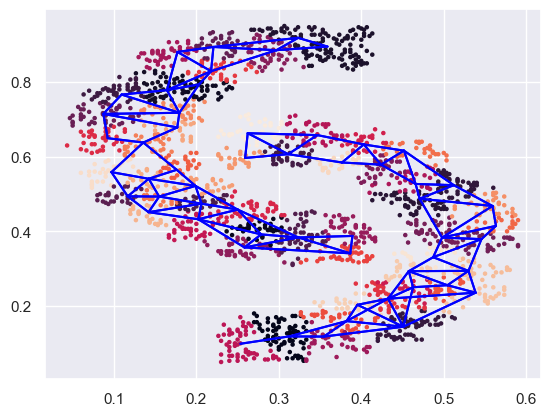

In [17]:
# Iterate over each row and column in the distance_matrix_np array
for i in range(distance_matrix_np.shape[0]):
    for j in range(distance_matrix_np.shape[1]):
        # Check if the value is non-zero
        if distance_matrix_np[i][j] != 0:
            # Connect the points in data_c1 corresponding to the cluster IDs
            plt.plot([data_c1[i][0], data_c1[j][0]], [data_c1[i][1], data_c1[j][1]],'blue')

# Plot the scatter plot of data_c1 with cluster IDs
plt.scatter(x=result1['x'], y=result1['y'], c=result1['Cluster ID'], s=5)

# Show the plot
plt.show()


In [23]:
cluster_id1 = 7
cluster_samples1 = result1[result1['Cluster ID'] == cluster_id1]
random_sample1 = cluster_samples1.sample(n=1)
coordinates1 = random_sample1[['x', 'y']].values[0]
print(coordinates1)


[0.5167 0.5   ]


In [24]:
cluster_id2 = 0
cluster_samples2 = result1[result1['Cluster ID'] == cluster_id2]
random_sample2 = cluster_samples2.sample(n=1)
coordinates2 = random_sample2[['x', 'y']].values[0]
print(coordinates2)

[0.33   0.0533]


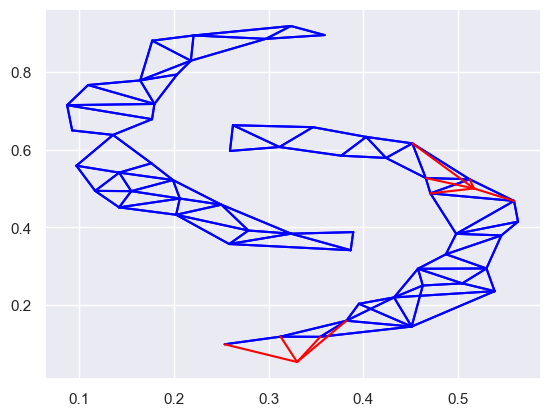

In [26]:
# Iterate over each row and column in the distance_matrix_np array
for i in range(distance_matrix_np.shape[0]):
    for j in range(distance_matrix_np.shape[1]):
        # Check if the value is non-zero
        if distance_matrix_np[i][j] != 0:
            # Connect the points in data_c1 corresponding to the cluster IDs
            plt.plot([data_c1[i][0], data_c1[j][0]], [data_c1[i][1], data_c1[j][1]],'blue')

# Plot the scatter plot of data_c1 with cluster IDs
# plt.scatter(x=result1['x'], y=result1['y'], c=result1['Cluster ID'], cmap='viridis', s=5)
plt.plot([coordinates1[0], data_c1[cluster_id1][0]], [coordinates1[1], data_c1[cluster_id1][1]],'red')
for j in range(distance_matrix_np.shape[1]):
    # Check if the value is non-zero
    if distance_matrix_np[cluster_id1][j] != 0:
        # Connect the points in data_c1 corresponding to the cluster IDs
        plt.plot([coordinates1[0], data_c1[j][0]], [coordinates1[1], data_c1[j][1]],'red')
plt.plot([coordinates2[0], data_c1[cluster_id2][0]], [coordinates2[1], data_c1[cluster_id2][1]],'red')
for j in range(distance_matrix_np.shape[1]):
    # Check if the value is non-zero
    if distance_matrix_np[cluster_id2][j] != 0:
        # Connect the points in data_c1 corresponding to the cluster IDs
        plt.plot([coordinates2[0], data_c1[j][0]], [coordinates2[1], data_c1[j][1]],'red')
# Show the plot
plt.show()